# Исследование о продаже игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
Инструкция по выполнению проекта

**Цель исследования** — проверим 2 гипотезы:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Ход исследования**

Данные об играх мы получим из файла `/datasets/games.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы поищем возможность исправить самые критичные ошибки данных.Так же проведём анализ данных, выявим закономерности и напишем общий вывод.
 
Таким образом, исследование пройдёт в 5 этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Проверка гипотез.
 5. Вывод.


###  Открываем данные

####  Импортируем библиотеки

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats as st

#### Откроем файл с данными и изучим общую информацию 

In [2]:
games = pd.read_csv('/datasets/games.csv')

#### Выводим первые 30 строк датафрейма games

In [3]:
print(games.head(30))

                                            Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck Hunt      NES           1984.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS       

###  Подготaвливaем данные

#### Заменим названия столбцов (приведем к нижнему регистру)

In [4]:
games.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


#### Преобразуем данные в нужный тип и заполним пропуски

In [5]:
games.info() # выводим тип данных 
print(games.isna().sum()) # выводим количество пропусков

games.fillna({"genre" : "-"}, inplace=True) # заменим пропущенные значения на прочерк
 
games.dropna(subset = ['name', 'year_of_release'], inplace = True) # удаляем строки с пропусками в столбцах

import numpy as np #импортируем библиотеку

games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True).astype('float64') #Заменим tbd на NaN и заменим тип с object na float


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
r

In [6]:
# выводим количество явных дубликатов
print(games['name'].duplicated().sum())
print(games['platform'].duplicated().sum())
print(games['year_of_release'].duplicated().sum())
print(games['genre'].duplicated().sum())
print(games['na_sales'].duplicated().sum())
print(games['eu_sales'].duplicated().sum())
print(games['jp_sales'].duplicated().sum())
print(games['other_sales'].duplicated().sum())
print(games['critic_score'].duplicated().sum())
print(games['user_score'].duplicated().sum())
print(games['rating'].duplicated().sum())

5018
16413
16407
16432
16043
16137
16200
16289
16362
16348
16435


В столбце **user_score** мы встретили аббревиатуру **«tbd»** которая расшифровывается как **«не определено»**, возможно игра ещё не получила достаточно оценок, тогда заменим эти значения на **NaN**, так же поменяли тип данных нa **float64** для дальнейшего анализа. Посчитали количество явных дубликатов для каждого столбца. В столбце **name и year_of_release** удалили пропуски, так как их менее 5%. Столбцы **critic_score и rating** оставляем как есть, так как при замене могут исказится данные. В столбце **genre** мы поставили прочерки, так как по названию игры мы не можем определить в какой категории игра. В целом интересующие нам данные приведены в порядок

#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [7]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

### Проведем исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

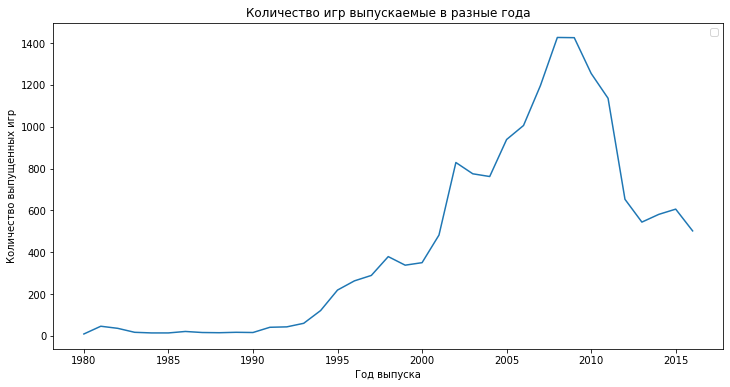

In [8]:
games_on_period = games.pivot_table(index='year_of_release', values='name', aggfunc='count') #считаем  выпуск игр за предоставленный период
plt.figure(figsize=(12,6)) #строим линейный график
sns.lineplot(data=games_on_period) 
plt.title("Количество игр выпускаемые в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')

Из графика мы видим, что **количество выпускаемых игр резко возрастает с 1990 года, спад мы наблюдаем с 2009 года.** Максимум было выпущено около 1400 игр в 2008 и 2009 году соотвественно.Раньше мы могли заметить, что игры разрабатывались с возможностями консолей, ПК. Спад происходит из-за того, что к играм стало больше требований например к геймплею, текстурам, ИИ и др., тем самым увеличилось время создания игр которые соотвествуют современным реалиям потребителя

#### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Найдём самые популярные платформы по продажам игр и построим столбчатый график

Text(0, 0.5, 'Количество продаж')

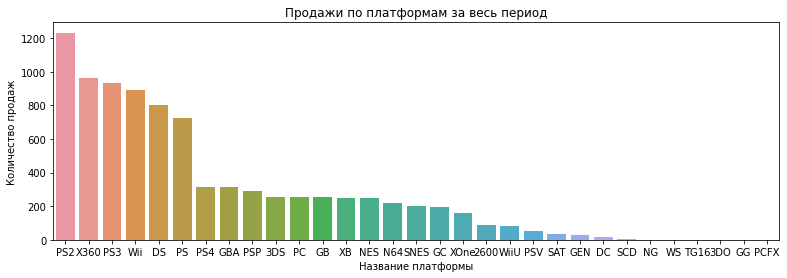

In [9]:
sales_on_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False) #считаем  выпуск игр по платформам

plt.figure(figsize=(13,4)) #строим столбчатый график
sns.barplot(x=sales_on_platform.index,y=sales_on_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Из графика мы видим, **что самые продаваемые игры принадлежат 6 платформам**, как - **PS2, XBOX360, PS3, Wii, DS, PS**. Исходя из этого возьмём **6** данных платформ и построим график распределения по годам

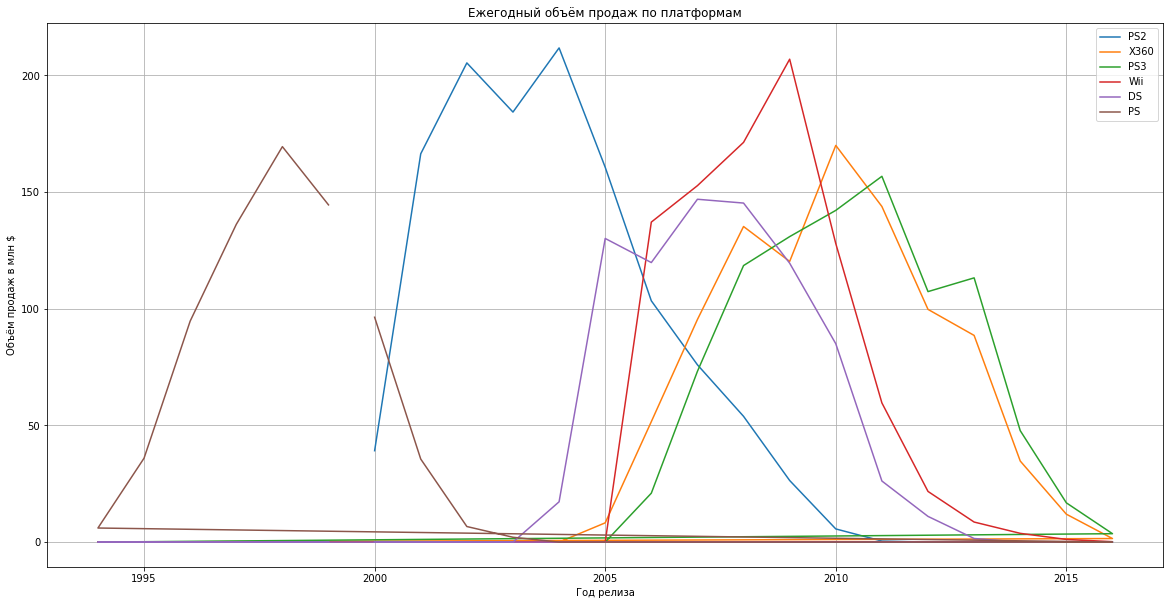

In [10]:
# возьмём отдельные обьемы продаж под каждую платформу
PS2 = games.query('platform =="PS2"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
X360 = games.query('platform =="X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
PS3 = games.query('platform =="PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
Wii = games.query('platform =="Wii"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
DS = games.query('platform =="DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
PS = games.query('platform =="PS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

#создаем сводную таблицу
top_6_games = (
    PS2.merge(X360, how='outer', on='year_of_release')
    .merge(PS3, how='outer', on='year_of_release')
    .merge(Wii, how='outer', on='year_of_release')
    .merge(DS, how='outer', on='year_of_release')
    .merge(PS, how='outer', on='year_of_release')
)
# Переименовываю названия столбцов для убобства
top_6_games.set_axis(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], axis = 'columns', inplace = True)
top_6_games = top_6_games.query('year_of_release >= 1990').fillna(0) # Пропуски заменяю на 0, фильтрую значения от 1990 года и выше

# строим линейный график для визуализации данных
top_6_games.plot(figsize=(20, 10), title='Ежегодный объём продаж по платформам', grid=True).set(xlabel='Год релиза', ylabel='Объём продаж в млн $')
plt.show()

График показывает, что новые платформы появляются в среднем через 3 года, а старые держатся в течении 8-10 лет

#### Возьмием данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Возьмём актуальный период с **2012 по 2016** год, так как будем следовать тенденциям современности и соотвественно новых  платформ

#### Не учитывайте в работе данные за предыдущие годы.

In [11]:
actual_games = games.query('year_of_release >= 2012') #создадим новую таблицу с периодом с 2012 года по 2016 
actual_games.head(10) # выведем на экран первые 10 строк

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012.0,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


#### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

Найдём лидирующие платформы по продажам и построим график

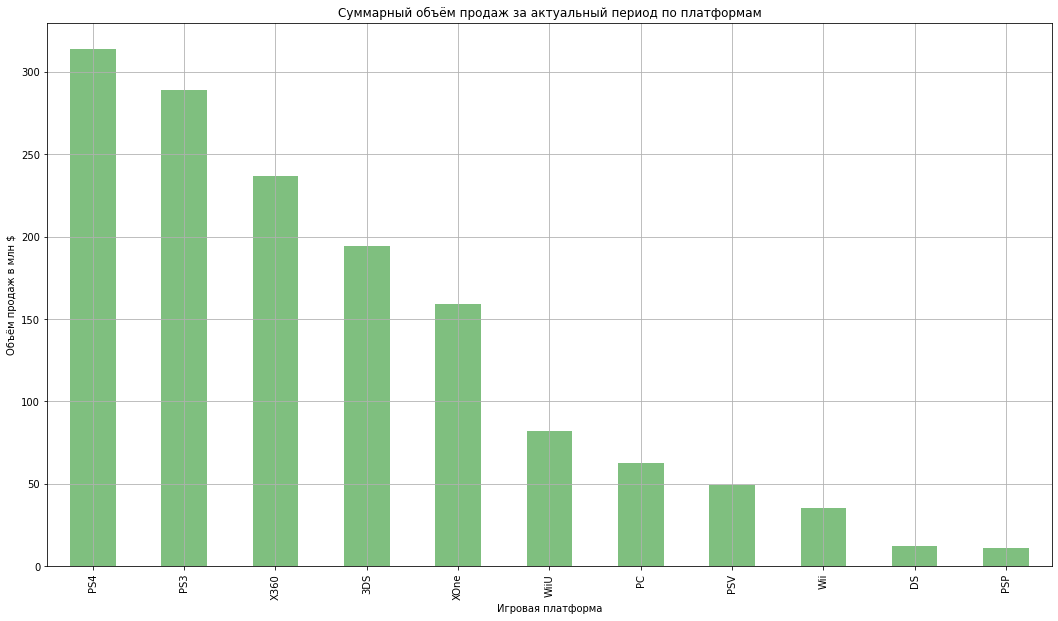

In [12]:
(
    actual_games
    .pivot_table(index='platform', values='total_sales', aggfunc='sum') #находим сумму по заданным критериям
    .sort_values('total_sales', ascending = False)
    .plot(y='total_sales', kind='bar', figsize=(18, 10), title='Суммарный объём продаж за актуальный период по платформам', grid=True, color='green', alpha=0.5, legend=False)
    .set(xlabel='Игровая платформа', ylabel='Объём продаж в млн $')
) #строим график
plt.show()

График показывает лидирующие платформы, возьмём **ТОП-5** из них и это **PS3, PS4,  XBOX360, 3DS, XBOXOne**

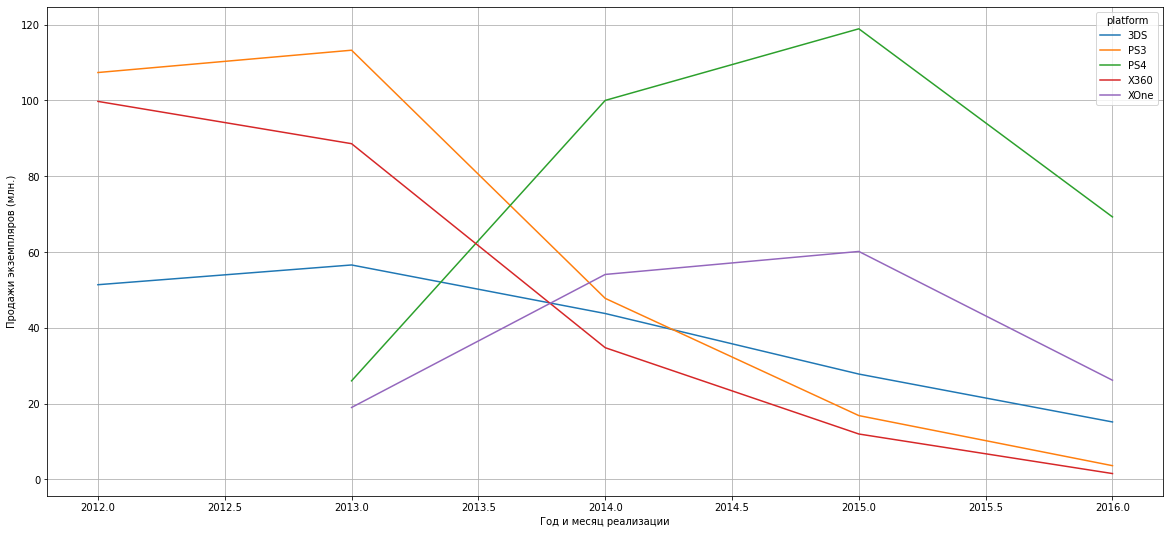

In [13]:
(
    games # задаём нужные нам параметры
    .query("platform == ['PS3', 'PS4', 'X360', '3DS', 'XOne'] and year_of_release >= 2012")
    .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(20, 9))
) 
plt.xlabel('Год и месяц реализации') #строим график
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Мы видим, что в **2013** году у платформ **PS3, XBOX360 и 3DS** начала **падать** продажа игр, связанные с тем, что вышли новые платформы **PS4** и **XBOXOne.** Мы видим что старт **PS4** был очень **стремительным**, **XBOXOne** более **равномерным**. Так же возьмём данные платформы как **потенциально прибыльные**


#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

In [14]:
#отфильтруем таблицу из ТОП-5 потенциально прибыльных платформ
actual_games = games.query('platform == "PS4" or platform == "PS3" or platform == "X360" or platform == "3DS" or platform == "XOne" and year_of_release >= 2012')



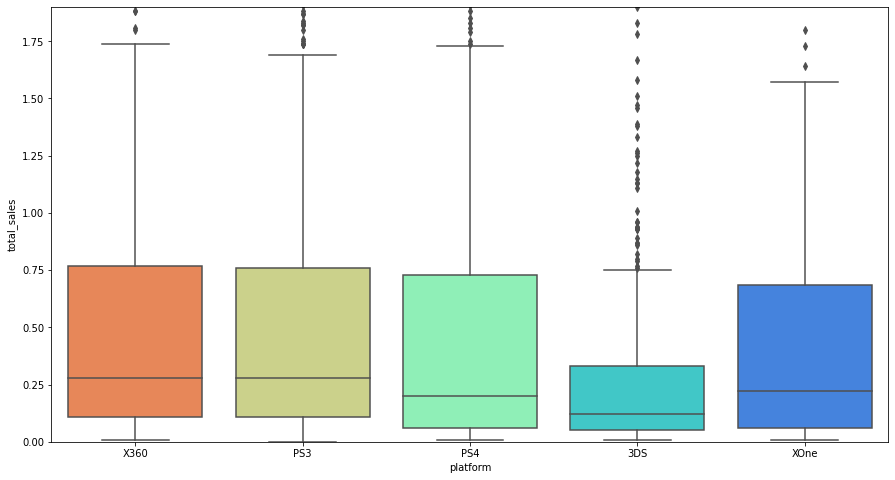

In [15]:

plt.rcParams['figure.figsize']=(15, 8) #строим диаграмму размаха
ax = sns.boxplot(x="platform", y="total_sales", data=actual_games, palette='rainbow_r')
ax.set_ylim(0, 1.9)
plt.show()

Диаграмма размаха нам показывает, что продажи **XBOX360** и **PS3** лидеры продаж по **медианным** и **средним** показателям. Заметим такую же практически тенденцию у **PS4** и **XBOXOne**. Игры на **3DS** продаются считай в **2-3** раза меньше чем на  остальные платформы. Так как мы будем прогнозировать на 2017 год в дальнейшем мы возьмём **новые** платформы 

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Построим диаграммы рассеивания и корреляции критиками и пользователями по платформе **PS4**

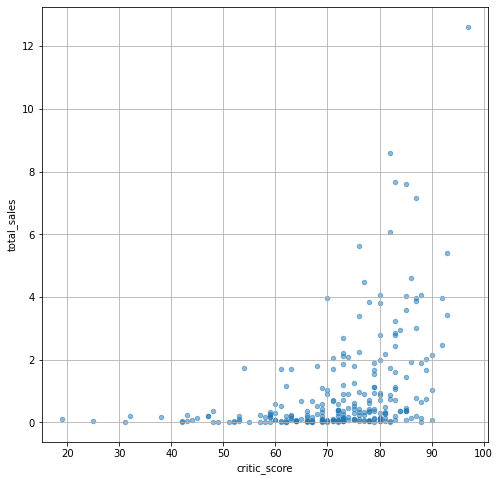

In [16]:
# выведем таблицу рассеивания игр на PS4 оценённых критиками
actual_games[actual_games['platform']=='PS4'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(8,8), grid=True)
plt.show()

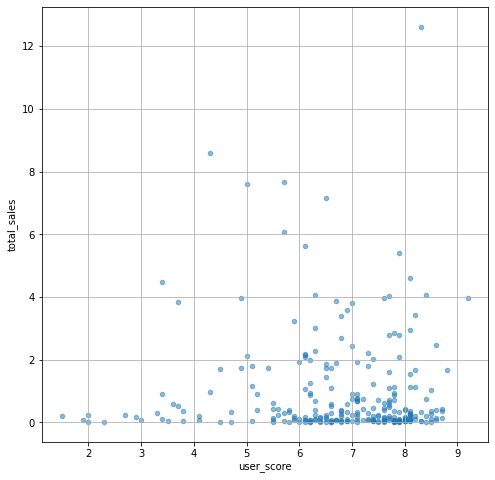

In [17]:
# выведем таблицу рассеивания игр на PS4 оценённых пользователями
actual_games[actual_games['platform']=='PS4'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(8,8), grid=True)
plt.show()

In [18]:
ps_4_critic_score = actual_games[actual_games['platform']=='PS4'] #находим корреляцию по оценке игр критиками
ps4_cor_critic_score = ps_4_critic_score['critic_score'].corr(ps_4_critic_score['total_sales'])
display('Корреляция слабая, положительная: {}'.format(ps4_cor_critic_score))


'Корреляция слабая, положительная: 0.40656790206178095'

In [19]:
ps_4_user_score = actual_games[actual_games['platform']=='PS4'] #находим корреляцию по оценке игр пользователями
ps4_cor_user_score = ps_4_user_score['user_score'].corr(ps_4_user_score['total_sales'])
display('Корреляция слабая, отрицательная: {}'.format(ps4_cor_user_score))

'Корреляция слабая, отрицательная: -0.031957110204556376'

Построим диаграммы рассеивания и корреляции критиками и пользователями по платформе **XBOXOne**

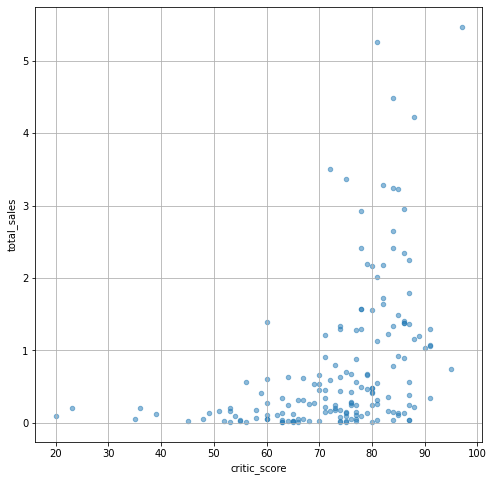

In [20]:
# выведем таблицу рассеивания игр на XOne оценённых критиками
actual_games[actual_games['platform']=='XOne'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(8,8), grid=True)
plt.show()

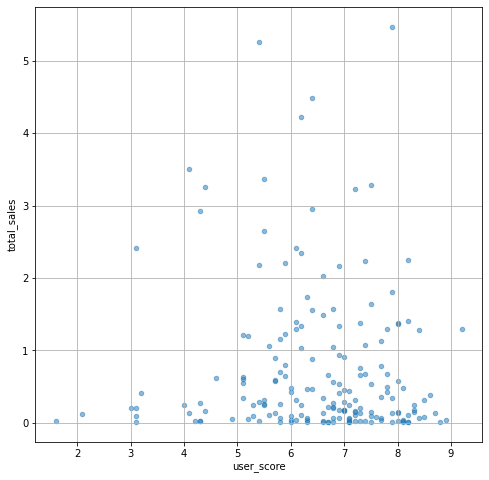

In [21]:
# выведем таблицу рассеивания игр на XOne оценённых пользователями
actual_games[actual_games['platform']=='XOne'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(8,8), grid=True)
plt.show()

In [22]:
xone_critic_score = actual_games[actual_games['platform']=='XOne'] #находим корреляцию по оценке игр XOne критиками
xone_cor_critic_score = xone_critic_score['critic_score'].corr(xone_critic_score['total_sales'])
display('Корреляция слабая, положительная: {}'.format(xone_cor_critic_score))

'Корреляция слабая, положительная: 0.4169983280084017'

In [23]:
xone_user_score = actual_games[actual_games['platform']=='XOne'] #находим корреляцию по оценке игр XOne пользователями
xone_cor_user_score = xone_user_score['user_score'].corr(xone_user_score['total_sales'])
display('Корреляция слабая, отрицательная: {}'.format(xone_cor_user_score))

'Корреляция слабая, отрицательная: -0.06892505328279414'

Из диаграмм мы видим, что по оценкам пользователей и критиков на данных платформах оценки в большей степени **положительные**. Корреляция показала, что связь слабая, соотвественно от **оценок продажи не зависят**

#### Соотнесем выводы с продажами игр на других платформах.

In [24]:
games_all = games.query('year_of_release >= 2012') #создаём таблицу для игр других платформ
games['total_sales'] =  games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games_all.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012.0,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


In [25]:
games_all.groupby('platform')['total_sales'].describe() # выводим на экран другие сгруппированные платформы с количеством продаж 

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


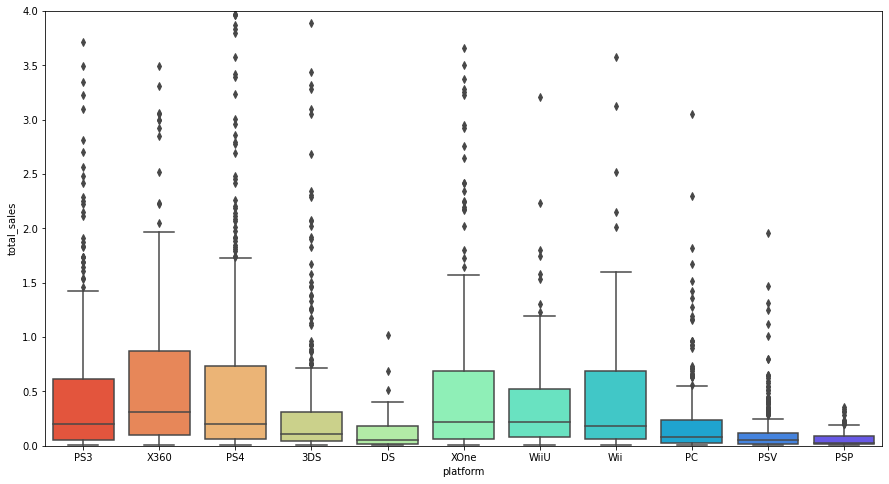

In [26]:
plt.rcParams['figure.figsize']=(15, 8) #строим диаграмму размаха
ax = sns.boxplot(x="platform", y="total_sales", data=games_all, palette='rainbow_r')
ax.set_ylim(0, 4)
plt.show()

**XBOXOne, WiiU, PS4,PS3** имеют практически **медианные** продажи на одном уровне, так же все платформы не выходят за **медианные** продажи в **0,25** млн продаж

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Text(0, 0.5, 'Количество продаж')

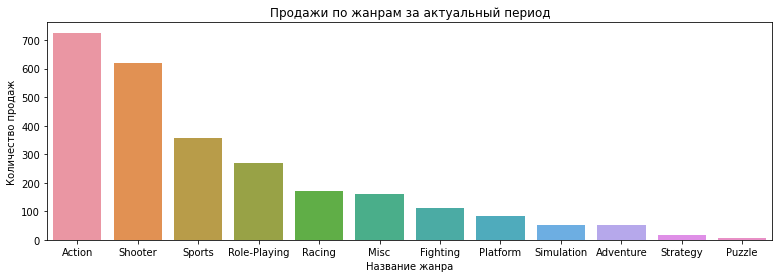

In [27]:
sales_on_genre = actual_games.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False) #считаем жанры по платформам
plt.figure(figsize=(13,4)) #строим столбчатый график
sns.barplot(x=sales_on_genre.index,y=sales_on_genre['total_sales'])
plt.title("Продажи по жанрам за актуальный период")
plt.xlabel("Название жанра")
plt.ylabel("Количество продаж")


Столбчатый график нам показал, что в **ТОП-3** по продажам входят с колоссальным преимуществом такие жанры как **Shooter, Action и Sports**. Различие с высокими и низкими продажами существует

### Составим портрет пользователя каждого региона

#### Определим для пользователя каждого региона (NA, EU, JP). Самые популярные платформы (топ-5). Опишем различия в долях продаж.

Text(0, 0.5, 'Количество продаж')

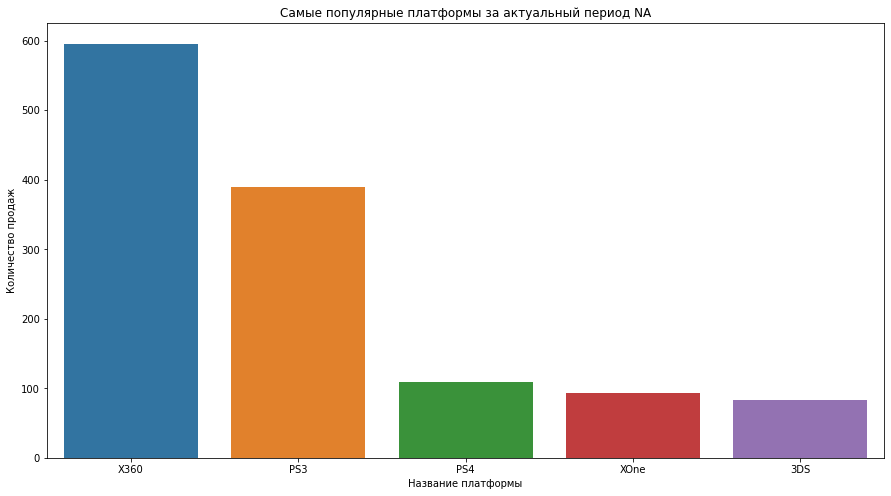

In [28]:
# создаем сводную таблицу для региона NA с актуальным периодом
popular_platform_na = actual_games.query('year_of_release >= 2012 and na_sales > 0') 
popular_platform_na = actual_games.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values( #считаем популярные платформы
    by='na_sales', ascending=False) 
plt.figure(figsize=(15,8)) #строим столбчатый график
sns.barplot(x=popular_platform_na.index,y=popular_platform_na['na_sales'])
plt.title("Самые популярные платформы за актуальный период NA")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

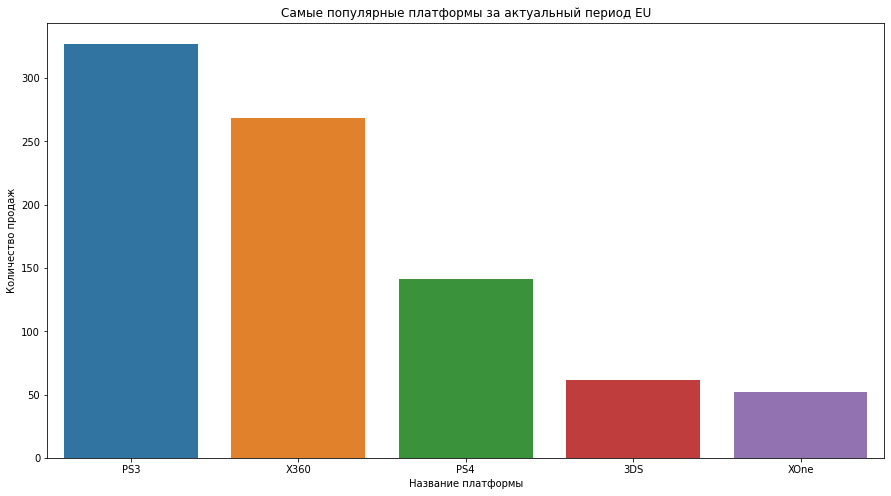

In [29]:
# создаем сводную таблицу для региона EU с актуальным периодом
popular_platform_eu = actual_games.query('year_of_release >= 2012 and eu_sales > 0') 
popular_platform_eu = actual_games.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values( #считаем популярные платформы
    by='eu_sales', ascending=False) 
plt.figure(figsize=(15,8)) #строим столбчатый график
sns.barplot(x=popular_platform_eu.index,y=popular_platform_eu['eu_sales'])
plt.title("Самые популярные платформы за актуальный период EU")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

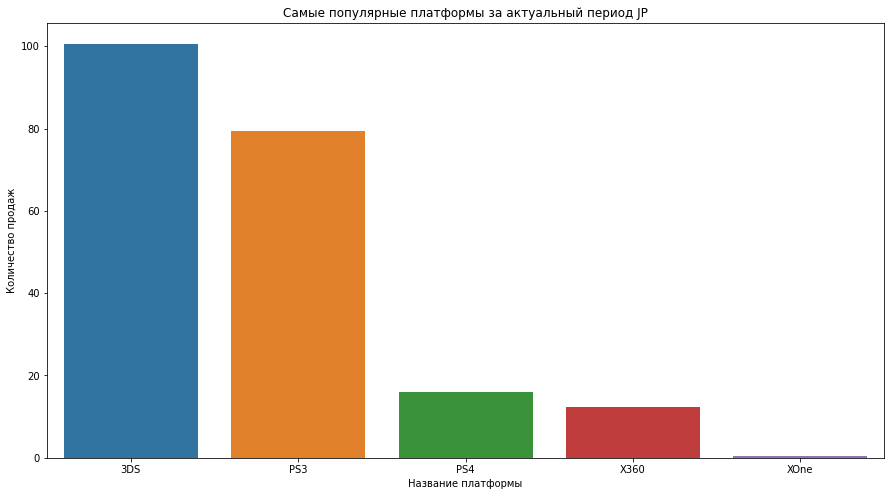

In [30]:
# создаем сводную таблицу для региона JP с актуальным периодом
popular_platform_jp = actual_games.query('year_of_release >= 2012 and jp_sales > 0') 
popular_platform_jp = actual_games.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values( #считаем популярные платформы
    by='jp_sales', ascending=False) 
plt.figure(figsize=(15,8)) #строим столбчатый график
sns.barplot(x=popular_platform_jp.index,y=popular_platform_jp['jp_sales'])
plt.title("Самые популярные платформы за актуальный период JP")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

В Северной Америке доминируют продажи платформы  корпораци **«Microsoft»**, а в Европе корпорации **«Sony»**, японцы предпочитают 3DS от компании **«Nintendo»**

#### Определим для пользователя каждого региона (NA, EU, JP). Самые популярные жанры (топ-5). Поясним разницу

Text(0, 0.5, 'Количество продаж')

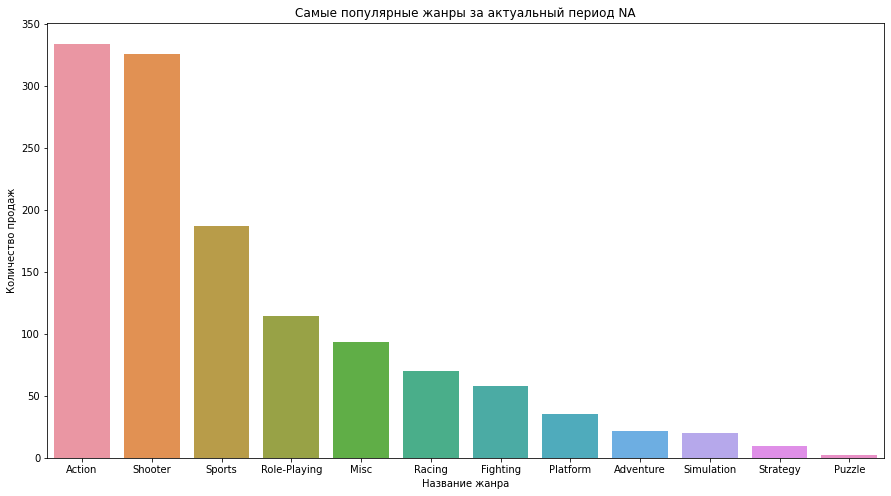

In [31]:
# создаем сводную таблицу для региона NA с актуальным периодом
popular_genre_na = actual_games.query('year_of_release >= 2012 and na_sales > 0') 
popular_genre_na = actual_games.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values( #считаем популярные жанры
    by='na_sales', ascending=False) 
plt.figure(figsize=(15,8)) #строим столбчатый график
sns.barplot(x=popular_genre_na.index,y=popular_genre_na['na_sales'])
plt.title("Самые популярные жанры за актуальный период NA")
plt.xlabel("Название жанрa")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

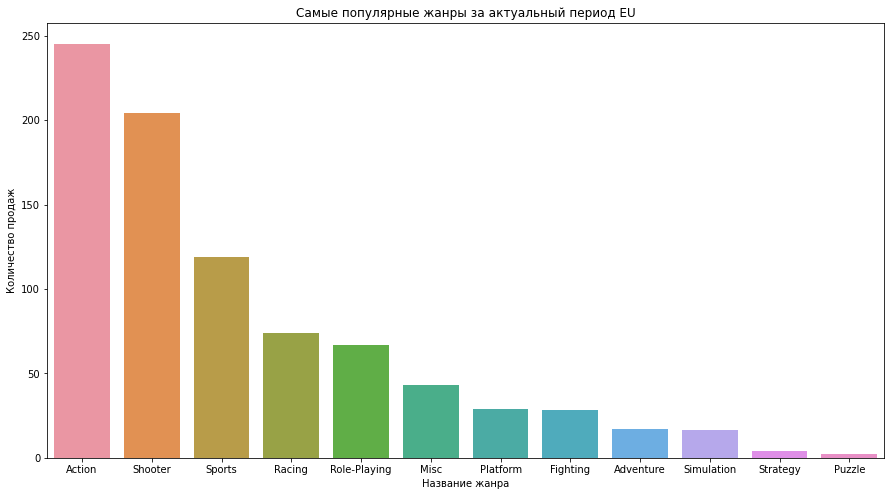

In [32]:
# создаем сводную таблицу для региона EU с актуальным периодом
popular_genre_eu = actual_games.query('year_of_release >= 2012 and eu_sales > 0') 
popular_genre_eu = actual_games.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values( #считаем популярные жанры
    by='eu_sales', ascending=False) 
plt.figure(figsize=(15,8)) #строим столбчатый график
sns.barplot(x=popular_genre_eu.index,y=popular_genre_eu['eu_sales'])
plt.title("Самые популярные жанры за актуальный период EU")
plt.xlabel("Название жанрa")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

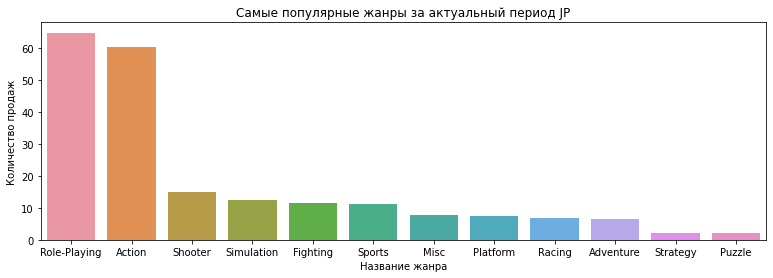

In [33]:
# создаем сводную таблицу для региона JP с актуальным периодом
popular_genre_jp = actual_games.query('year_of_release >= 2012 and jp_sales > 0') 
popular_genre_jp = actual_games.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values( #считаем популярные жанры
    by='jp_sales', ascending=False) 
plt.figure(figsize=(13,4)) #строим столбчатый график
sns.barplot(x=popular_genre_jp.index,y=popular_genre_jp['jp_sales'])
plt.title("Самые популярные жанры за актуальный период JP")
plt.xlabel("Название жанрa")
plt.ylabel("Количество продаж")

Как мы видим, что в Северной Америке в **ТОП-5** жанров игр входят **Action, Shooter, Sports, Role-Playing, Misc**. Так же в Европе мы наблюдаем такую же практически ситуацию, в **ТОП-5** жанров входят**Action, Shooter,  Sports, Racing, Role-Playing**. В Японском кластере в **ТОП-5** входят **Role-Playing, Action, Shooter, Simulation, Fighting**.Так как большинство игр в жанре  **Role-Playing** в основном выпускались для японской аудитории, соотвественно и отсюда популярность, но Америку и Европу охватывает практически одинаковая целевая аудитория, тем самым популярность жанров схожи

#### Определим для пользователя каждого региона (NA, EU, JP). Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Text(0, 0.5, 'Количество продаж')

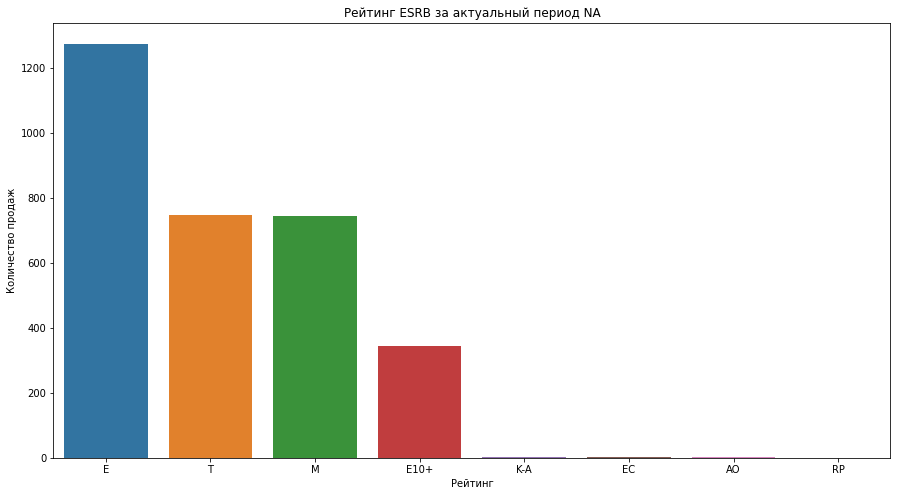

In [34]:
# создаем сводную таблицу для региона NA с актуальным периодом
rating_sales_na = games.query('year_of_release >= 2012 and na_sales > 0') 
rating_sales_na = games.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values( #считаем продажи по рейтингу
    by='na_sales', ascending=False) 
plt.figure(figsize=(15,8)) #строим столбчатый график
sns.barplot(x=rating_sales_na.index,y=rating_sales_na['na_sales'])
plt.title("Рейтинг ESRB за актуальный период NA")
plt.xlabel("Рейтинг")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

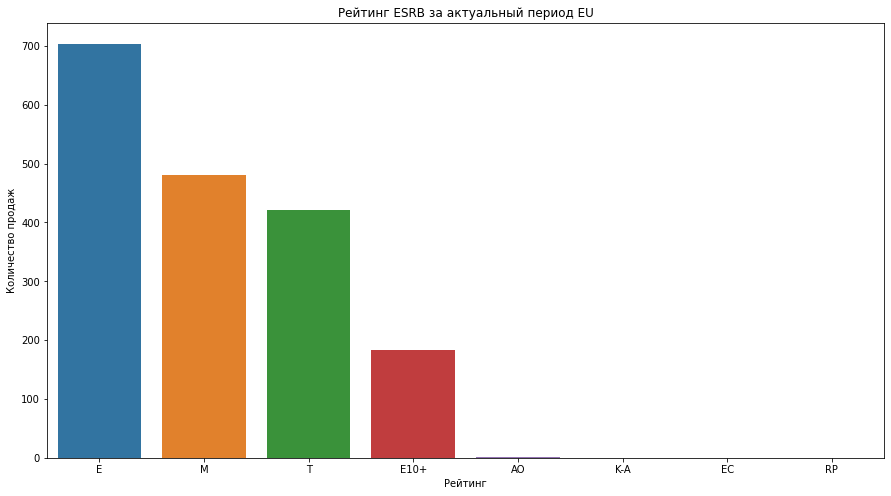

In [35]:
# создаем сводную таблицу для региона EU с актуальным периодом
rating_sales_eu = games.query('year_of_release >= 2012 and eu_sales > 0') 
rating_sales_eu = games.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values( #считаем продажи по рейтингу
    by='eu_sales', ascending=False) 
plt.figure(figsize=(15,8)) #строим столбчатый график
sns.barplot(x=rating_sales_eu.index,y=rating_sales_eu['eu_sales'])
plt.title("Рейтинг ESRB за актуальный период EU")
plt.xlabel("Рейтинг")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

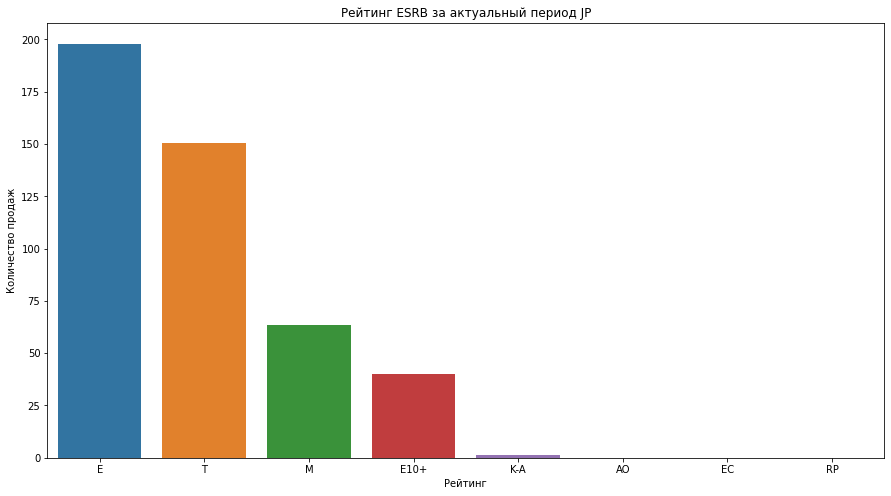

In [36]:
# создаем сводную таблицу для региона JP с актуальным периодом
rating_sales_jp = games.query('year_of_release >= 2012 and jp_sales > 0') 
rating_sales_jp = games.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values( #считаем продажи по рейтингу
    by='jp_sales', ascending=False) 
plt.figure(figsize=(15,8)) #строим столбчатый график
sns.barplot(x=rating_sales_jp.index,y=rating_sales_jp['jp_sales'])
plt.title("Рейтинг ESRB за актуальный период JP")
plt.xlabel("Рейтинг")
plt.ylabel("Количество продаж")

Во всех 3 кластерах мы видим , что **самый популярный рейтинг "E"**, который подходит для маленьких и взрослых

### Проверим гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


* Нулевая гипотеза будет сформулирована следующим образом: 
    * Средние пользовательские рейтинги платформы __``XOne``__ __равны__ средним пользовательским рейтингам платформы __``PC``__
* Альтернативная гипотеза звучит следующим образом: 
    * Средние пользовательские рейтинги платформы __``XOne``__ __не равны__ средним пользовательским рейтингам платформы __``PC``__

Будем сравнивать две генеральные совокупности, используем метод scipy.stats.ttest_ind()

In [37]:
# создаем выборку для платформы "XOne" со всеми оценками пользователей
data_xone = games.query('platform =="XOne" and user_score < 101 and year_of_release >= 2012')['user_score']
# создаем выборку для платформы "PC" со всеми оценками пользователей
data_pc = games.query('platform =="PC" and user_score < 101 and year_of_release >= 2012')['user_score']

# делаем выборку из 250 оценок 
array_xone = data_xone[0:250].tolist()
array_pc = data_pc[0:250].tolist()

alpha = .05 # критический уровень статистической значимости
            
results = st.ttest_ind(array_xone, array_pc)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Нулевая гипотеза', 'отвергнута!')
else:
    print('Нулевая гипотеза',  'не отвергнута!')

p-значение: 0.5535080500643661
Нулевая гипотеза не отвергнута!


**Нулевая** гипотеза говорит, что средние показателей рейтинга платформ **XBOX и PC одинаковые**

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные


* Нулевая гипотеза будет сформулирована следующим образом: 
    * Средние пользовательские рейтинги жанра __``Action``__ __равны__ средним пользовательским рейтингам жанра __``Sports``__
* Альтернативная гипотеза звучит следующим образом: 
    * Средние пользовательские рейтинги жанра __``Action``__ __не равны__ средним пользовательским рейтингам жанра __``Sports``__

Будем сравнивать две генеральные совокупности, используем метод scipy.stats.ttest_ind()

In [38]:
# создаем series для жанра "Action" со всеми оценками пользователей
array_action = games.query('genre =="Action" and user_score < 101 and year_of_release >= 2012')['user_score']
# создаем series для жанра "Sports" со всеми оценками пользователей
array_sports = games.query('genre =="Sports" and user_score < 101 and year_of_release >= 2012')['user_score']

# делаем выборку из 250 оценок
array_action = array_action[0:250].tolist()
array_sports = array_sports[0:250].tolist()

alpha = .05 # критический уровень статистической значимости
            
results = st.ttest_ind(array_action, array_sports)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Нулевая гипотеза', 'отвергнута!')
else:
    print('Нулевая гипотеза', 'не отвергнута!')

p-значение: 2.1766321356370407e-20
Нулевая гипотеза отвергнута!


**Альтернативная** гипотеза говорит, что все  средние пользовательские рейтинги жанров **Action и Sports разные**

### Общий вывод

В данном проекте мы изучили данные, поправили столбцы, преобразовали данные в нужный тип и заполнили пропуски. Делали это все по минимуму, так как могут исказиться данные. Так же вывели общую сумму по продажам игр во всех регионах. 
Осуществили исследовательский анализ данных и вывели из них:
1. С **1990** года начался **всплеск** выпуска игр;
2. В **ТОП-6** платформ за весь период исследования вошли такие консоли как **PS2, XBOX360, PS3, Wii, DS**;

Далее мы выбрали **актуальный** период с **2012** года для дальнейшего прогноза в **2017** году и выявили следующее:

1. С **2013** года приставки **PS4** и XBOXOne начали расти в продажах, а так же они имели практически одинаковые продажи;
2. С **2012** года самыми продаваемыми приставками были **XBOX360** и **PS3**;
3. Самыми популярными жанрами за актуальный период стали **Shooter, Action, Sports, Role-Playing, Racing**;
4. Американские юзеры больше предпочитают **XBOX360**, европейские - **PS3**, японские - **3DS**;
5. Так же нашли популярные жанры. Американцы и европейцы больше любят играть в **Action**. Японцы в **Role-Playing**;
6. Во всех кластерах рейтинг ESRB в основном **«E»**;

Так же мы подтвердили гипотезы, что пользовательские рейтинги платформ XBOXOne и PC одинаковые, а то что средние пользовательские рейтинги жанров Action и Sports разные.